In [1]:
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data_dir = 'Alien_data'

In [5]:
metadata=pd.read_csv('Alien_data/sample_metadata.tsv', sep='\t')

In [11]:
metadata['alleged_abduction']= metadata['alleged_abduction'].values.astype(str)
metadata['alleged_abduction'] = metadata['alleged_abduction'].str.replace('0','non_abducted')
metadata['alleged_abduction'] = metadata['alleged_abduction'].str.replace('1','abducted')
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].values.astype(str)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('-1.0','one week before HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('-2.0','two weeks before HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('1.0','one week after HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('2.0','two weeks before HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('0.0','HCT week', regex=False)

,sampleid,stool_consistency,hct_source,disease,categorical_time_relative_to_engraftment,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
0,N4VICF,formed,cord,Myelodysplastic Syndromes,pre,one week before HCT,6.0,-6.0,non_abducted
1,8A0F9A,formed,cord,Leukemia,pre,two weeks before HCT,7.0,-7.0,non_abducted
2,5Y49IM,semi-formed,cord,Leukemia,peri,one week before HCT,7.0,0.0,abducted
3,ZKJI45,semi-formed,cord,Leukemia,post,one week after HCT,7.0,8.0,non_abducted
4,2I7SIQ,liquid,cord,Leukemia,peri,one week before HCT,0.0,0.0,abducted
...,...,...,...,...,...,...,...,...,...
156,HCMB0Y,formed,PBSC_unmodified,Leukemia,pre,two weeks before HCT,9.0,-9.0,non_abducted
157,P0A2X1,semi-formed,PBSC_unmodified,Leukemia,pre,one week before HCT,9.0,-3.0,non_abducted
158,F89RLS,semi-formed,PBSC_unmodified,Non-Hodgkin's Lymphoma,pre,one week before HCT,3.0,-3.0,non_abducted
159,ZQT8ZN,liquid,PBSC_unmodified,Non-Hodgkin's Lymphoma,pre,one week before HCT,3.0,-1.0,non_abducted


In [12]:
metadata.to_csv('Alien_data/str_metadata.tsv', sep='\t', encoding='utf-8', escapechar='\n', index=False)

In [7]:
! qiime feature-table summarize \
  --i-table $data_dir/table-filtered.qza \
  --m-sample-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/feature_table_filtered.qzv

Saved Visualization to: Alien_data/feature_table_filtered.qzv


In [8]:
Visualization.load(f'{data_dir}/feature_table_filtered.qzv')

<visualization: Visualization uuid: 3e5dbd11-171e-4da0-bf74-1d211b387894>

### **Alpha rarefaction using the fragment insert tree:**

In [9]:
# show rarefaction plot (we can also try to increase the depth) 
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table-filtered.qza \
    --i-phylogeny $data_dir/sepp-tree.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: Alien_data/alpha-rarefaction.qzv


In [10]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: 323ba8ef-a095-4dc0-be8f-01956f365f9e>

### Alpha rarefaction using the de novo tree (an alternative but not suggested):

In [11]:
# A slightly different plot by using the bootstraped tree, but the trends are similar:
#! qiime diversity alpha-rarefaction \
#    --i-table $data_dir/table-filtered.qza \
#    --i-phylogeny $data_dir/raxml-cat-bootstrap-rooted.qza \
#    --p-max-depth 10000 \
#    --m-metadata-file $data_dir/sample_metadata.tsv \
#   --o-visualization $data_dir/alpha-rarefaction-denovo.qzv

In [12]:
# Visualization.load(f'{data_dir}/alpha-rarefaction-denovo.qzv')

### **Diversity analysis**

In [13]:
# sampling depth of 3000 is chosen (we can discuss which is the best depth to chose)
# 4000?
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/table-filtered.qza \
  --i-phylogeny $data_dir/sepp-tree.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --p-sampling-depth 3000 \
  --output-dir $data_dir/core-metrics-results

Saved FeatureTable[Frequency] to: Alien_data/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: Alien_data/core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: Alien_data/core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCo

**Test the associations between categorical metadata columns with the corresponding diversity metrics**: 

In [15]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/faith-pd-group-significance.qzv


In [16]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: 25131dda-6a4e-4397-b3bb-d1289bd6869a>

In [17]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/observed-features-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/observed-features-group-significance.qzv


In [18]:
Visualization.load(f'{data_dir}/core-metrics-results/observed-features-group-significance.qzv')

<visualization: Visualization uuid: bbb2f3d6-4884-4f4f-a265-b6af7739689c>

In [19]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/shannon-group-significance.qzv


In [20]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon-group-significance.qzv')

<visualization: Visualization uuid: ae1d9dd5-cc44-49e7-a05d-fc698246bd9d>

In [21]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness-vector-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/evenness-vector-group-significance.qzv


In [22]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness-vector-group-significance.qzv')

<visualization: Visualization uuid: 13978bfd-f292-4de2-bf8a-b72382b070a9>

**Next, test whether numeric sample metadata columns (day_relative_to_nearest_hct) are correlated with microbial community**:

* Inspect the entire `day` column:

In [23]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/faith-pd-group-significance-numeric.qzv


In [24]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 98495c3e-97a7-4bc1-916f-4cf3fc6f9537>

In [25]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/observed-features-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/observed-features-group-significance-numeric.qzv


In [26]:
Visualization.load(f'{data_dir}/core-metrics-results/observed-features-group-significance-numeric.qzv')

<visualization: Visualization uuid: 9ef51a8f-011d-461a-9e5f-257c68ef56fb>

In [27]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/shannon-group-significance-numeric.qzv


In [28]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon-group-significance-numeric.qzv')

<visualization: Visualization uuid: 77db2a55-e8f4-488e-a960-ff0acedc1198>

In [29]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/str_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness-vector-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/evenness-vector-group-significance-numeric.qzv


In [30]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness-vector-group-significance-numeric.qzv')

<visualization: Visualization uuid: 496f37f5-76c2-4b99-837f-030198ad970f>

* Subset the metadata `day` column and feature table samples into two categories: `before hct` and `after hct`:

In [31]:
# before hct
! qiime feature-table filter-samples \
    --i-table $data_dir/table-filtered.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[day_relative_to_nearest_hct]<'0' or [day_relative_to_nearest_hct]='0'" \
    --o-filtered-table $data_dir/before_hct_feature_table.qza

Saved FeatureTable[Frequency] to: Alien_data/before_hct_feature_table.qza


In [32]:
before_hct = pd.DataFrame(data=metadata[metadata['day_relative_to_nearest_hct'] <= 0])
before_hct.to_csv('Alien_data/before_hct_metadata.tsv', sep='\t', encoding='utf-8', escapechar='\n', index=False)

In [33]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/before_hct_feature_table.qza \
  --i-phylogeny $data_dir/sepp-tree.qza \
  --m-metadata-file $data_dir/before_hct_metadata.tsv \
  --p-sampling-depth 3000 \
  --output-dir $data_dir/core-metrics-results-before-hct

Saved FeatureTable[Frequency] to: Alien_data/core-metrics-results-before-hct/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-before-hct/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-before-hct/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-before-hct/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-before-hct/evenness_vector.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-before-hct/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-before-hct/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-before-hct/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-before-hct/bray_curtis_distance_matrix.qza
Saved PCoAResults to: Alien_data/core-metrics-results-before-hct/unweighted_unifrac_pcoa

In [34]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-before-hct/faith_pd_vector.qza \
  --m-metadata-file $data_dir/before_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-before-hct/faith-pd-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-before-hct/faith-pd-group-significance-numeric.qzv


In [35]:
Visualization.load(f'{data_dir}/core-metrics-results-before-hct/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 135acac2-ec46-4093-b346-3e79a3317276>

In [36]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-before-hct/observed_features_vector.qza \
  --m-metadata-file $data_dir/before_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-before-hct/observed-features-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-before-hct/observed-features-group-significance-numeric.qzv


In [37]:
Visualization.load(f'{data_dir}/core-metrics-results-before-hct/observed-features-group-significance-numeric.qzv')

<visualization: Visualization uuid: e6bf483e-e39b-4676-84a7-ba6080d053b9>

In [38]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-before-hct/shannon_vector.qza \
  --m-metadata-file $data_dir/before_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-before-hct/shannon-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-before-hct/shannon-group-significance-numeric.qzv


In [39]:
Visualization.load(f'{data_dir}/core-metrics-results-before-hct/shannon-group-significance-numeric.qzv')

<visualization: Visualization uuid: 7750a955-f276-4cdd-8765-be54915081e4>

In [40]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-before-hct/evenness_vector.qza \
  --m-metadata-file $data_dir/before_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-before-hct/evenness-vector-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-before-hct/evenness-vector-group-significance-numeric.qzv


In [41]:
Visualization.load(f'{data_dir}/core-metrics-results-before-hct/evenness-vector-group-significance-numeric.qzv')

<visualization: Visualization uuid: 52bd6455-5c60-41a7-b59c-99dfe22d9d38>

In [42]:
# after hct
after_hct = pd.DataFrame(data=metadata[metadata['day_relative_to_nearest_hct'] >= 0])
after_hct.to_csv('Alien_data/after_hct_metadata.tsv', sep='\t', encoding='utf-8', escapechar='\n', index=False)
after_hct

,sampleid,stool_consistency,hct_source,disease,categorical_time_relative_to_engraftment,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
2,5Y49IM,semi-formed,cord,Leukemia,peri,one week before HCT,7.0,0.0,abducted
3,ZKJI45,semi-formed,cord,Leukemia,post,one week after HCT,7.0,8.0,non_abducted
4,2I7SIQ,liquid,cord,Leukemia,peri,one week before HCT,0.0,0.0,abducted
5,PCUMU7,semi-formed,cord,Leukemia,post,two weeks before HCT,0.0,16.0,abducted
7,AFG7YZ,semi-formed,cord,Leukemia,post,two weeks before HCT,1.0,15.0,non_abducted
...,...,...,...,...,...,...,...,...,...
144,RE2G74,liquid,cord,Hodgkin's Disease,post,one week after HCT,6.0,9.0,non_abducted
145,K613DJ,semi-formed,cord,Hodgkin's Disease,post,one week after HCT,6.0,13.0,non_abducted
148,0WG67D,semi-formed,cord,Leukemia,post,two weeks before HCT,1.0,16.0,abducted
151,95NCMG,liquid,cord,Non-Hodgkin's Lymphoma,peri,one week before HCT,5.0,0.0,non_abducted


In [43]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table-filtered.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[day_relative_to_nearest_hct]>'0' or [day_relative_to_nearest_hct]='0'" \
    --o-filtered-table $data_dir/after_hct_feature_table.qza

Saved FeatureTable[Frequency] to: Alien_data/after_hct_feature_table.qza


In [44]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/after_hct_feature_table.qza \
  --i-phylogeny $data_dir/sepp-tree.qza \
  --m-metadata-file $data_dir/after_hct_metadata.tsv \
  --p-sampling-depth 3000 \
  --output-dir $data_dir/core-metrics-results-after-hct

Saved FeatureTable[Frequency] to: Alien_data/core-metrics-results-after-hct/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-after-hct/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-after-hct/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-after-hct/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results-after-hct/evenness_vector.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-after-hct/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-after-hct/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-after-hct/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results-after-hct/bray_curtis_distance_matrix.qza
Saved PCoAResults to: Alien_data/core-metrics-results-after-hct/unweighted_unifrac_pcoa_results.q

In [45]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-after-hct/faith_pd_vector.qza \
  --m-metadata-file $data_dir/after_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-after-hct/faith-pd-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-after-hct/faith-pd-group-significance-numeric.qzv


In [46]:
Visualization.load(f'{data_dir}/core-metrics-results-after-hct/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 52076ce6-42ea-4037-9dc4-bdefb6ab1a1e>

In [47]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-after-hct/observed_features_vector.qza \
  --m-metadata-file $data_dir/after_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-after-hct/observed-features-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-after-hct/observed-features-group-significance-numeric.qzv


In [48]:
Visualization.load(f'{data_dir}/core-metrics-results-after-hct/observed-features-group-significance-numeric.qzv')

<visualization: Visualization uuid: 4319e521-a521-4cbc-bc73-377e78c2cc2e>

In [49]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-after-hct/shannon_vector.qza \
  --m-metadata-file $data_dir/after_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-after-hct/shannon-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-after-hct/shannon-group-significance-numeric.qzv


In [50]:
Visualization.load(f'{data_dir}/core-metrics-results-after-hct/shannon-group-significance-numeric.qzv')

<visualization: Visualization uuid: 83c7a918-2534-4bde-bac7-d27e3dec7408>

In [51]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results-after-hct/evenness_vector.qza \
  --m-metadata-file $data_dir/after_hct_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results-after-hct/evenness-vector-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results-after-hct/evenness-vector-group-significance-numeric.qzv


In [52]:
Visualization.load(f'{data_dir}/core-metrics-results-after-hct/evenness-vector-group-significance-numeric.qzv')

<visualization: Visualization uuid: 1f51c2cb-6d54-4948-8334-eb1b1f52651d>

### **Pandas plots (to be continued)** 

In [53]:
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'sample_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
# we can use different columns for md, here I just made an example of 'categorical_time_relative_to_engraftment'

In [54]:
md

sampleid
N4VICF     pre
8A0F9A     pre
5Y49IM    peri
ZKJI45    post
2I7SIQ    peri
          ... 
HCMB0Y     pre
P0A2X1     pre
F89RLS     pre
ZQT8ZN     pre
62ARKK     pre
Name: categorical_time_relative_to_engraftment, Length: 161, dtype: object

In [55]:
md1=md.dropna()
div1=div.dropna()
concat=pd.concat([md1,div1], axis=1, join='inner')
concat

,categorical_time_relative_to_engraftment,faith_pd
N4VICF,pre,9.060101
8A0F9A,pre,8.970630
2I7SIQ,peri,7.185442
PCUMU7,post,6.151667
XO59R8,pre,9.864536
...,...,...
U5Y4NC,pre,7.288647
HCMB0Y,pre,6.998841
P0A2X1,pre,5.662648
F89RLS,pre,5.057090


Text(0, 0.5, 'faith_pd')

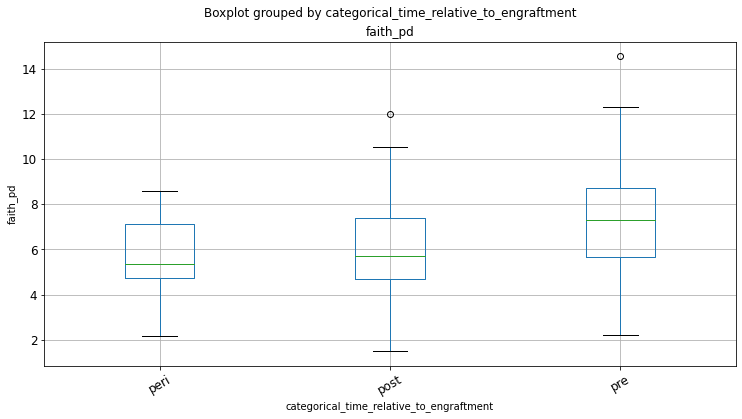

In [56]:
concat.boxplot(column="faith_pd", by="categorical_time_relative_to_engraftment", rot=30, fontsize=12, figsize=(12,6))
plt.ylabel('faith_pd')